In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [9]:
#Importing the dataset
loan_data = pd.read_csv("loan_train.csv")
loan_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
# Checking first few observations
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#Drop unnecessary columns
loan_data.drop(["Loan_ID","Education","CoapplicantIncome","Loan_Amount_Term","Property_Area","Dependents"],axis="columns",inplace=True)


In [12]:
#Checking the data types in the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           601 non-null    object 
 1   Married          611 non-null    object 
 2   Self_Employed    582 non-null    object 
 3   ApplicantIncome  614 non-null    int64  
 4   LoanAmount       592 non-null    float64
 5   Credit_History   564 non-null    float64
 6   Loan_Status      614 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.7+ KB


In [13]:
#Checking for duplicates
loan_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [14]:
#Checking for missing values
loan_data.isna().any()

Gender              True
Married             True
Self_Employed       True
ApplicantIncome    False
LoanAmount          True
Credit_History      True
Loan_Status        False
dtype: bool

In [15]:
#Checking for the sum of NA's
loan_data.isnull().sum()


Gender             13
Married             3
Self_Employed      32
ApplicantIncome     0
LoanAmount         22
Credit_History     50
Loan_Status         0
dtype: int64

In [16]:
#Assigning binary codes to the categorical columns
loan_data['Gender']= loan_data['Gender'].map({'Male':0, 'Female':1})
loan_data['Married']= loan_data['Married'].map({'No':0, 'Yes':1})
loan_data['Self_Employed']= loan_data['Self_Employed'].map({'No':0, 'Yes':1})
loan_data['Loan_Status']= loan_data['Loan_Status'].map({'N':0, 'Y':1})

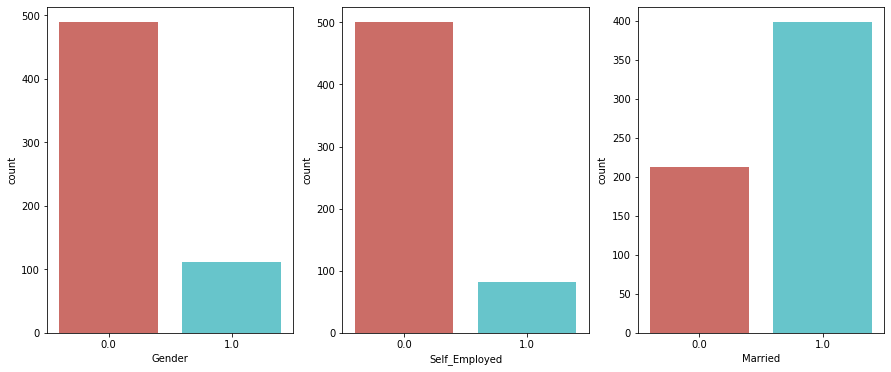

In [17]:
#Visualizing modes for the categorical columns
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot('Gender', data = loan_data, palette='hls')
plt.subplot(1,3,2)
sns.countplot('Self_Employed', data = loan_data, palette='hls')
plt.subplot(1,3,3)
sns.countplot('Married', data = loan_data, palette='hls')
plt.show()

In [18]:
loan_data['Married'].value_counts() 

1.0    398
0.0    213
Name: Married, dtype: int64

In [19]:
#Replacing the NA's in categorical columns with their modes
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [20]:
#Replacing the NA's in numerical columns with their medians
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data["Credit_History"].median()) 


In [21]:
loan_data.isna().any()

Gender             False
Married            False
Self_Employed      False
ApplicantIncome    False
LoanAmount         False
Credit_History     False
Loan_Status        False
dtype: bool

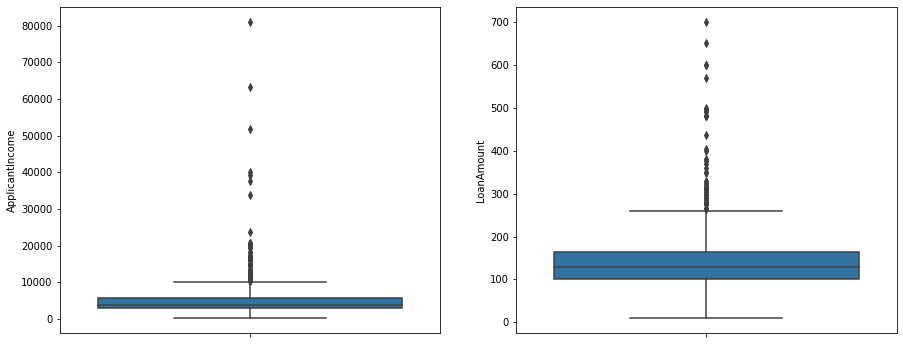

In [22]:
#Visualizing outliers
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(data=loan_data,y="ApplicantIncome")
plt.subplot(1,2,2)
sns.boxplot(data=loan_data,y="LoanAmount")
plt.show()

In [71]:
#create a function to find outliers using IQR
def find_outliers_IQR(loan_data):
    q1=loan_data.quantile(0.25)
    q3=loan_data.quantile(0.75)
    IQR=q3-q1
    outliers = loan_data[((loan_data<(q1-1.5*IQR)) | (loan_data>(q3+1.5*IQR)))]   
    return outliers

In [72]:
outliers = find_outliers_IQR(loan_data) 
outliers

,Gender,Married,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,120.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
609,1.0,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
outliers = find_outliers_IQR(loan_data["ApplicantIncome"])
print("number of outliers:" + str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers:0
max outlier value: nan
min outlier value: nan


Series([], Name: ApplicantIncome, dtype: float64)

In [74]:
def impute_outliers_IQR(loan_data):
    q1=loan_data.quantile(0.25)
    q3=loan_data.quantile(0.75)
    IQR=q3-q1
    upper = loan_data[~(loan_data>(q3+1.5*IQR))].max()
    lower = loan_data[~(loan_data<(q1-1.5*IQR))].min()
    loan_data= np.where(loan_data > upper,loan_data.median(),np.where(loan_data < lower,loan_data.median(),loan_data))                                                          
    return loan_data

In [75]:
#Passing the columns through the function above to transform the outliers into the meadian values of each column.
loan_data["ApplicantIncome"]=  impute_outliers_IQR(loan_data["ApplicantIncome"])
loan_data["LoanAmount"]=  impute_outliers_IQR(loan_data["LoanAmount"])

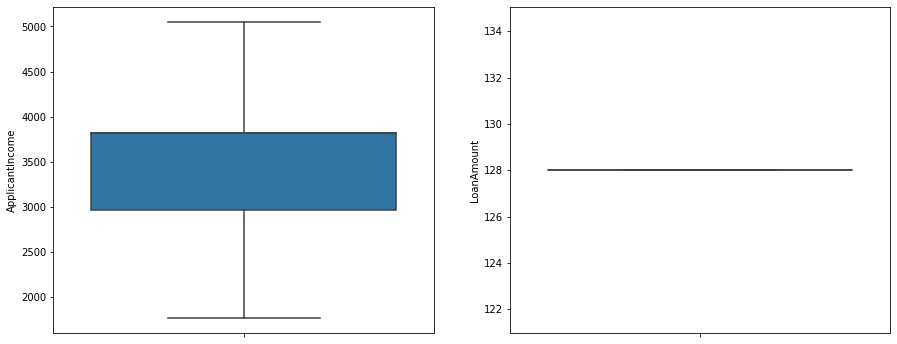

In [76]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(data=loan_data,y="ApplicantIncome")
plt.subplot(1,2,2)
sns.boxplot(data=loan_data,y="LoanAmount")
plt.show() 


In [77]:
#Independent and dependent Variables
X = loan_data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount','Credit_History','Self_Employed']]
y = loan_data.Loan_Status

In [78]:
# Split dataset into training set and test set
# 70% training and 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [79]:
# Create Random Forest classifier object
# Train  Random Forest  Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, random_state=10)

In [80]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [81]:
#Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [82]:
#Prediction for a single item
model.predict([[0,1,0,4583,128.0,1.0]])

array([1], dtype=int64)